In [40]:
from os.path import expanduser
import os


def load_env():
    home = expanduser("~")
    print(home)
    with open(home+'/.env', 'r') as f:
        env = dict()
        for line in f.readlines():
            key, value = line.split('=')
            env[key] = value.split('\n')[0]
        return env

def export_env():
    """Loads your .env file and exports the three variables important for mlflow.
    MLFLOW_TRACKING_USERNAME, MLFLOW_TRACKING_PASSWORD, MLFLOW_TRACKING_URI
    """
    env = load_env()
    for key in ["MLFLOW_TRACKING_USERNAME", "MLFLOW_TRACKING_PASSWORD", "MLFLOW_TRACKING_URI"]:
        os.environ[key] = env[key]

In [41]:
### RUN FIRST:
### sudo openvpn --config kit.ovpn

import mlflow
from mlflow_utils.load_env import export_env

export_env()
mlflow.set_experiment("demo")

In [43]:
import pysftp
import paramiko
import os
import numpy as np

class GDB9_data_instance:
    def __init__(self, path):
        if not os.path.exists(path):
            raise Exception("Path {} does not exist.".format(path))
        with open(path, 'r') as f:
            num_of_atoms = int(f.readline())
            self.scalar_properties = f.readline().strip().replace("gdb ","").split("\t")
            self.scalar_properties = [float(p) for p in self.scalar_properties]
            self.scalar_properties[0] = int(self.scalar_properties[0])
            self.atoms = []
            for i in range(num_of_atoms):
                atom_posXYZ_MullikenPartialCharge = f.readline().strip().replace(" ","").replace("*^","e").split("\t")
                self.atoms.append(atom_posXYZ_MullikenPartialCharge)
            self.harmonic_vibrational_frequencies = f.readline().strip().split("\t")
            (self.gdb17_smile, self.b3lyp_relaxation_smile) = f.readline().strip().split("\t")
            (self.corina_InChI, self.b3lyp_InChI) = f.readline().strip().split("\t")
        
        
gdb9_data_dir = r"dsgdb9nsd"
gdb9_data = []
amount = 1000
currently_checked = 0

config = paramiko.config.SSHConfig()
config.parse(open(os.path.expanduser('~/.ssh/config')))
conf = config.lookup('lsdf')
with pysftp.Connection(host=conf['hostname'], username=conf['user'], private_key=conf['identityfile'][0]) as sftp:
    dataset_path = '/lsdf/kit/iti/projects/aimat-mlflow/datasets/dsgdb9nsd'
    with sftp.cd(dataset_path):
        #returned = sftp.execute('ls | wc -l')
        #sftp.chdir(dataset_path)
        cmd = 'cd ' + dataset_path + ' && ls | wc -l'
        returned = sftp.execute(cmd)
        num_files = [int(r.decode()) for r in returned][0]
        print("Number of files in the dataset: {}".format(num_files))
        for file in sftp.listdir():
            if len(gdb9_data) >= amount or currently_checked >= amount:
                break
            if file.endswith(".xyz"):
                currently_checked += 1
                #print(file)
                file_path = os.path.join(dataset_path, file)
                local_dir = os.getcwd() + '/data/' + gdb9_data_dir
                if not os.path.exists(local_dir):
                    os.makedirs(local_dir)
                local_path = os.path.join(local_dir, file)
                if not os.path.exists(local_path):
                    sftp.get(file_path, local_path)
                gdb9_data.append(GDB9_data_instance(local_path))

Number of files in the dataset: 133885
dsgdb9nsd_000001.xyz
dsgdb9nsd_000002.xyz
dsgdb9nsd_000003.xyz
dsgdb9nsd_000004.xyz
dsgdb9nsd_000005.xyz
dsgdb9nsd_000006.xyz
dsgdb9nsd_000007.xyz
dsgdb9nsd_000008.xyz
dsgdb9nsd_000009.xyz
dsgdb9nsd_000010.xyz
dsgdb9nsd_000011.xyz
dsgdb9nsd_000012.xyz
dsgdb9nsd_000013.xyz
dsgdb9nsd_000014.xyz
dsgdb9nsd_000015.xyz
dsgdb9nsd_000016.xyz
dsgdb9nsd_000017.xyz
dsgdb9nsd_000018.xyz
dsgdb9nsd_000019.xyz
dsgdb9nsd_000020.xyz
dsgdb9nsd_000021.xyz
dsgdb9nsd_000022.xyz
dsgdb9nsd_000023.xyz
dsgdb9nsd_000024.xyz
dsgdb9nsd_000025.xyz
dsgdb9nsd_000026.xyz
dsgdb9nsd_000027.xyz
dsgdb9nsd_000028.xyz
dsgdb9nsd_000029.xyz
dsgdb9nsd_000030.xyz
dsgdb9nsd_000031.xyz
dsgdb9nsd_000032.xyz
dsgdb9nsd_000033.xyz
dsgdb9nsd_000034.xyz
dsgdb9nsd_000035.xyz
dsgdb9nsd_000036.xyz
dsgdb9nsd_000037.xyz
dsgdb9nsd_000038.xyz
dsgdb9nsd_000039.xyz
dsgdb9nsd_000040.xyz
dsgdb9nsd_000041.xyz
dsgdb9nsd_000042.xyz
dsgdb9nsd_000043.xyz
dsgdb9nsd_000044.xyz
dsgdb9nsd_000045.xyz
dsgdb9nsd_000046

dsgdb9nsd_000461.xyz
dsgdb9nsd_000462.xyz
dsgdb9nsd_000463.xyz
dsgdb9nsd_000464.xyz
dsgdb9nsd_000465.xyz
dsgdb9nsd_000466.xyz
dsgdb9nsd_000467.xyz
dsgdb9nsd_000468.xyz
dsgdb9nsd_000469.xyz
dsgdb9nsd_000470.xyz
dsgdb9nsd_000471.xyz
dsgdb9nsd_000472.xyz
dsgdb9nsd_000473.xyz
dsgdb9nsd_000474.xyz
dsgdb9nsd_000475.xyz
dsgdb9nsd_000476.xyz
dsgdb9nsd_000477.xyz
dsgdb9nsd_000478.xyz
dsgdb9nsd_000479.xyz
dsgdb9nsd_000480.xyz
dsgdb9nsd_000481.xyz
dsgdb9nsd_000482.xyz
dsgdb9nsd_000483.xyz
dsgdb9nsd_000484.xyz
dsgdb9nsd_000485.xyz
dsgdb9nsd_000486.xyz
dsgdb9nsd_000487.xyz
dsgdb9nsd_000488.xyz
dsgdb9nsd_000489.xyz
dsgdb9nsd_000490.xyz
dsgdb9nsd_000491.xyz
dsgdb9nsd_000492.xyz
dsgdb9nsd_000493.xyz
dsgdb9nsd_000494.xyz
dsgdb9nsd_000495.xyz
dsgdb9nsd_000496.xyz
dsgdb9nsd_000497.xyz
dsgdb9nsd_000498.xyz
dsgdb9nsd_000499.xyz
dsgdb9nsd_000500.xyz
dsgdb9nsd_000501.xyz
dsgdb9nsd_000502.xyz
dsgdb9nsd_000503.xyz
dsgdb9nsd_000504.xyz
dsgdb9nsd_000505.xyz
dsgdb9nsd_000506.xyz
dsgdb9nsd_000507.xyz
dsgdb9nsd_000

In [44]:
smiles = [d.gdb17_smile for d in gdb9_data]
smiles

['C',
 'N',
 'O',
 'C#C',
 'C#N',
 'C=O',
 'CC',
 'CO',
 'CC#C',
 'CC#N',
 'CC=O',
 'NC=O',
 'CCC',
 'CCO',
 'COC',
 'C1CC1',
 'C1CO1',
 'CC(C)=O',
 'CC(N)=O',
 'NC(N)=O',
 'CC(C)C',
 'CC(C)O',
 'C#CC#C',
 'C#CC#N',
 'N#CC#N',
 'O=CC#C',
 'O=CC#N',
 'O=CC=O',
 'CC#CC',
 'CCC#C',
 'CCC#N',
 'NCC#N',
 'OCC#C',
 'OCC#N',
 'CCC=O',
 'CNC=O',
 'COC=O',
 'OCC=O',
 'CCCC',
 'CCCO',
 'CCOC',
 'OCCO',
 'CC1CC1',
 'CC1CO1',
 'CN1CC1',
 'OC1CC1',
 'C1CCC1',
 'C1COC1',
 'CC(C)=NO',
 'N1C=CC=C1',
 'N1C=CN=C1',
 'O1C=CC=C1',
 'O1C=CN=C1',
 'CC(C)(C)C',
 'CC(C)(C)O',
 'CC(=O)C#C',
 'CC(=O)C#N',
 'NC(=N)C#N',
 'NC(=O)C#C',
 'CC(=O)C=O',
 'NC(=N)C=O',
 'NC(=O)C=O',
 'CC(C)C#C',
 'CC(C)C#N',
 'CC(N)C#N',
 'CC(O)C#C',
 'CC(O)C#N',
 'CC(C)C=O',
 'CC(O)C=O',
 'CN(C)C=O',
 'CC(=O)CO',
 'CCC(C)=O',
 'CCC(N)=O',
 'CNC(C)=O',
 'CNC(N)=O',
 'COC(C)=N',
 'COC(C)=O',
 'COC(N)=O',
 'NC(=O)CO',
 '[NH3+]CC([O-])=O',
 'CC(C)CO',
 'CC(O)CO',
 'CCC(C)C',
 'CCC(C)O',
 'COC(C)C',
 'CC1(C)CC1',
 'CC1(C)CO1',
 'CC1(O)CC1',

In [45]:
homo_energies = np.array([d.scalar_properties[6] for d in gdb9_data])
homo_energies

array([-0.3877, -0.257 , -0.2928, -0.2845, -0.3604, -0.267 , -0.3385,
       -0.2653, -0.2609, -0.3264, -0.254 , -0.2543, -0.323 , -0.2619,
       -0.2525, -0.2888, -0.2682, -0.2431, -0.2436, -0.2495, -0.3167,
       -0.2612, -0.2599, -0.3102, -0.3696, -0.2777, -0.3166, -0.2668,
       -0.2412, -0.2592, -0.3213, -0.2683, -0.2595, -0.3018, -0.25  ,
       -0.2516, -0.2814, -0.2537, -0.317 , -0.2619, -0.2503, -0.2594,
       -0.2727, -0.2633, -0.2304, -0.239 , -0.2982, -0.2424, -0.2392,
       -0.2029, -0.2253, -0.2246, -0.2509, -0.3145, -0.2601, -0.2654,
       -0.3007, -0.2739, -0.2629, -0.2538, -0.2561, -0.2533, -0.2589,
       -0.318 , -0.2704, -0.2665, -0.3051, -0.2469, -0.255 , -0.2424,
       -0.2699, -0.2423, -0.2438, -0.2418, -0.2436, -0.2595, -0.2685,
       -0.2669, -0.246 , -0.2527, -0.2629, -0.2597, -0.3085, -0.2617,
       -0.2476, -0.2633, -0.2596, -0.2494, -0.263 , -0.2415, -0.25  ,
       -0.2788, -0.2437, -0.2647, -0.2896, -0.241 , -0.2419, -0.256 ,
       -0.2465, -0.2

In [46]:
import rdkit.Chem as Chem

fps = np.array([np.array(Chem.RDKFingerprint(Chem.MolFromSmiles(smi))).astype(float)
                                    for smi in smiles])
fps

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
train_features = fps
#test_features = 

train_labels = homo_energies
#test_labels = 

In [48]:
import matplotlib.pyplot as plt

def plot_learning_curve(title, train_scores, test_scores, fit_times, 
                        axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [49]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

mlflow.sklearn.autolog()

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

#model = MLPRegressor(random_state=1, max_iter=300)
model = RandomForestRegressor()

with mlflow.start_run() as run:
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, train_features, train_labels, cv=cv, n_jobs=None, return_times=True)

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021/01/24 15:40:00 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under sftp://lsdf/kit/iti/projects/aimat-mlflow/artifacts/1/c6f444c95d984406b6db2ff2189ed184/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.
2021/01/24 15:40:03 WARNING mlflow.models.model: Logging model metadata to the tracking ser

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/matplotlib/pyplot.py'>

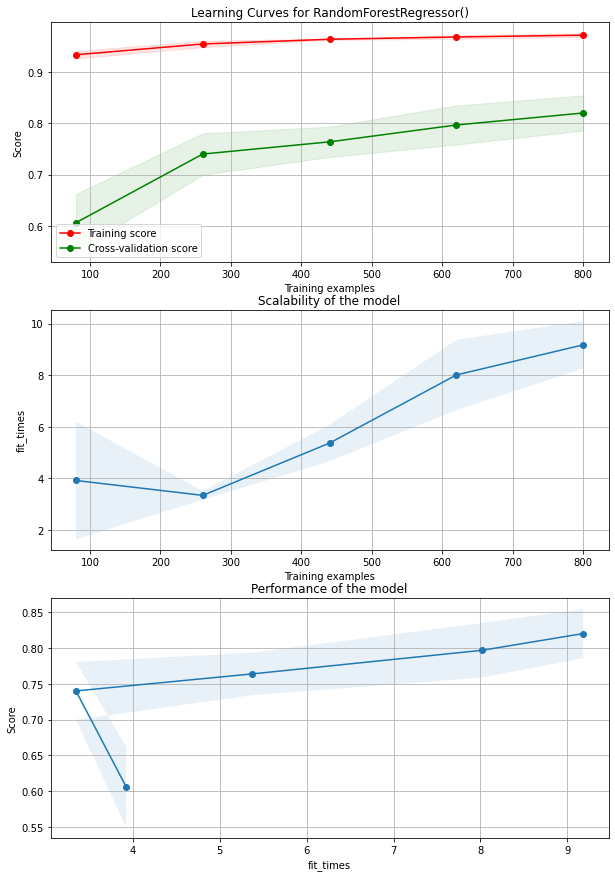

In [50]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves for " + str(model)

plot_learning_curve(title, train_scores, test_scores, fit_times, 
                    #axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4, train_sizes=train_sizes)
                    axes=axes, cv=cv, n_jobs=4, train_sizes=train_sizes)

## saving the current figure if neccesary ##
# plt.savefig('foo.png')

In [51]:
from pprint import pprint

def fetch_logged_data(run_id):
    client = mlflow.tracking.MlflowClient()
    data = client.get_run(run_id).data
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in client.list_artifacts(run_id, "model")]
    return data.params, data.metrics, tags, artifacts

params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

pprint(params)
pprint(metrics)
pprint(tags)
pprint(artifacts)

/home/erik/miniconda2/envs/automol/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'mse',
 'max_depth': 'None',
 'max_features': 'auto',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'min_impurity_decrease': '0.0',
 'min_impurity_split': 'None',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'n_estimators': '100',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': 'None',
 'verbose': '0',
 'warm_start': 'False'}
{'training_mae': 0.0032523642410714182,
 'training_mse': 3.5976763742897093e-05,
 'training_r2_score': 0.9687934912610023,
 'training_rmse': 0.005998063332684734,
 'training_score': 0.9687934912610023}
{'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
 'estimator_name': 'RandomForestRegressor'}
['model/MLmodel', 'model/conda.yaml', 'model/model.pkl']
